### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))

# overall mean
print("The overall mean is ",np.mean(m))
print("\n")

# mean of each row
row_mean = np.zeros(m.shape[0])
for i in range(m.shape[0]):
    row_mean[i] = np.mean(m[i])
    print("The mean of row {} is {}".format(i+1, row_mean[i]))
print("\n")

# mean of each column
column_mean = np.zeros(m.shape[1]) 
for i in range(m.shape[1]):
    column_mean[i] = np.mean(m[:,i])
    print("The mean of column {} is {}".format(i+1, column_mean[i]))


The overall mean is  5.5


The mean of row 1 is 1.5
The mean of row 2 is 5.5
The mean of row 3 is 9.5


The mean of column 1 is 4.0
The mean of column 2 is 5.0
The mean of column 3 is 6.0
The mean of column 4 is 7.0


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

# with np.outer()
uv_outer1 = np.outer(u,v)
print("Using np.outer()\n",uv_outer1,"\n")

# with a list comprehension

uv_outer2 = np.reshape(np.array([i*j for i in u for j in v]),(len(u),len(v)))
print("Using a list comprehension \n",uv_outer2,"\n")

# with broadcasting

uv_outer3 = np.tile(u,(4,1)).T*v
print("Using broadcasting \n",uv_outer3)

Using np.outer()
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Using a list comprehension 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Using broadcasting 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
#np.random.seed(12)
random_set = np.round(np.random.random(60), 3) # using np.round for readibility of the output, but it won't affect creating the matrix at all, since the floats are more precise than 0.1

random_matrix = np.reshape(random_set,(10,6))  #reshape the set into the 10x6 matrix.
matrix_mask = random_matrix >= 0.1             #create the boolean mask


matrix = np.array([random_matrix[i] if np.all(matrix_mask[i]) == True else np.zeros(len(random_matrix[i])) for i in range(random_matrix.shape[0])])                #the sauce of the problem: a row of matrix is only the same as a row of random_matrix if all the entries of that row are >= 0.1. If not, then the corresponding row is filled up with zeros.


print(random_matrix)  # printing the initial matrix just for comparison
print("\n")
print(matrix)

[[0.473 0.134 0.859 0.973 0.279 0.721]
 [0.828 0.966 0.097 0.249 0.931 0.369]
 [0.163 0.307 0.477 0.995 0.748 0.974]
 [0.702 0.203 0.828 0.32  0.938 0.915]
 [0.761 0.116 0.017 0.498 0.611 0.662]
 [0.171 0.491 0.833 0.231 0.771 0.956]
 [0.476 0.654 0.66  0.095 0.295 0.32 ]
 [0.838 0.255 0.788 0.254 0.303 0.9  ]
 [0.265 0.07  0.473 0.812 0.771 0.67 ]
 [0.805 0.316 0.923 0.614 0.925 0.76 ]]


[[0.473 0.134 0.859 0.973 0.279 0.721]
 [0.    0.    0.    0.    0.    0.   ]
 [0.163 0.307 0.477 0.995 0.748 0.974]
 [0.702 0.203 0.828 0.32  0.938 0.915]
 [0.    0.    0.    0.    0.    0.   ]
 [0.171 0.491 0.833 0.231 0.771 0.956]
 [0.    0.    0.    0.    0.    0.   ]
 [0.838 0.255 0.788 0.254 0.303 0.9  ]
 [0.    0.    0.    0.    0.    0.   ]
 [0.805 0.316 0.923 0.614 0.925 0.76 ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

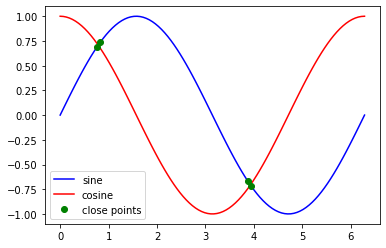

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

pie_array = np.linspace(0, 2*np.pi, 100, endpoint = True)
pie_array_10s = pie_array[0:100:10]

flipped_pie = pie_array[::-1]

small_difference_mask = abs(np.sin(pie_array)-np.cos(pie_array)) < 0.1
small_difference = pie_array[small_difference_mask]

plt.plot(pie_array, np.sin(pie_array), "b-", label = "sine")
plt.plot(pie_array, np.cos(pie_array), "r-", label = "cosine")
plt.plot(small_difference, np.sin(small_difference), "go", label = "close points")
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
u = np.arange(1, 11)
mult10 = np.outer(u, u)

print(mult10)
print("The trace is ",np.trace(mult10))
print("anto-diagonal", np.diag(mult10[::-1]))  # mult10[::-1] flips the matrix vertically, so the main diagonal becomes the anto-diagonal.
print("diagonal offset by 1 upwards:", np.diag(mult10, 1))  # feeding np.diag() a second argument k extracts the diagonal k units above the main diagonal (or below, if k <0)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
The trace is  385
anto-diagonal [10 18 24 28 30 30 28 24 18 10]
diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


In [6]:
matrix_gen = np.fromfunction(lambda i,j: i*j, (11,11))
matrix = matrix_gen[1:4,3:6]
matrix_gen

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
       [  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.],
       [  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.],
       [  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.],
       [  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.],
       [  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.],
       [  0.,   7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.],
       [  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.],
       [  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.],
       [  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
dumb_distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = dumb_distances*8/5 # it's about that much in km

# I was doing all the stuff in km's, but the output looks nicer with integers so I left it in miles

#Anyway, Each row indicates where you're going, each column indicates where you are.

# For example, if you're in column 1, you are in Chicago, and if you're in Column 1 row 3, you're in chicago and you're 303 miles away Saint-Louis.
# On the other hand, if you're in column 4 row 2, you are in Tulsa, and Springfield is 538 miles behind you (hence the negative sign)

dist_grid = np.tile(distances,(len(distances),1))
dist_grid = dist_grid.T-distances
print(dist_grid)

#We could do abs() to eliminate the negative, but then we'd only have a symmetric matrix, and the sign gives us some information anyway.

# I'm looking forward to doing this with pandas, and actually be able to put headers and line titles.

[[    0.   -316.8  -484.8 -1177.6 -1393.6 -1880.  -2360.  -2470.4 -3060.8
  -3916.8]
 [  316.8     0.   -168.   -860.8 -1076.8 -1563.2 -2043.2 -2153.6 -2744.
  -3600. ]
 [  484.8   168.      0.   -692.8  -908.8 -1395.2 -1875.2 -1985.6 -2576.
  -3432. ]
 [ 1177.6   860.8   692.8     0.   -216.   -702.4 -1182.4 -1292.8 -1883.2
  -2739.2]
 [ 1393.6  1076.8   908.8   216.      0.   -486.4  -966.4 -1076.8 -1667.2
  -2523.2]
 [ 1880.   1563.2  1395.2   702.4   486.4     0.   -480.   -590.4 -1180.8
  -2036.8]
 [ 2360.   2043.2  1875.2  1182.4   966.4   480.      0.   -110.4  -700.8
  -1556.8]
 [ 2470.4  2153.6  1985.6  1292.8  1076.8   590.4   110.4     0.   -590.4
  -1446.4]
 [ 3060.8  2744.   2576.   1883.2  1667.2  1180.8   700.8   590.4     0.
   -856. ]
 [ 3916.8  3600.   3432.   2739.2  2523.2  2036.8  1556.8  1446.4   856.
      0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
def sieve(N):
    sample = np.arange(N+1)
    sample_mask = np.array(sample, dtype = bool) # we create a mask right away off the sample
    for i in sample:
        if i == 0 or i == 1:  # set the numbers 0 and 1 because we all know they're not prime.
            sample_mask[i] = False
        else:
            for j in range(2,i):
                if i % j == 0: # if i is divisible by j for any j value up to i, then sample[i] isn't prime, so we set the corresponding mask element to False. 
                    sample_mask[i] = False 
    primes = sample[sample_mask]
    return primes

# %timeit sieve(10)
# print(sieve(10))
# %timeit sieve(100)
# print(sieve(100))
%timeit sieve(1000)
sieve(1000)

189 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

The time taken increases by about 10N for an increase of 1 in N. Not a great algorithm. I'm coding the Erathostones sieve on the next cell and timing it.

In [9]:
def Eratoast(N):
    sample = np.arange(N+1)
    sample_mask = np.array(sample, dtype = bool)
    
    for i in range(int(np.sqrt(N))):
        if i == 0 or i == 1:  # set the numbers 0 and 1 because we all know they're not prime.
            sample_mask[i] = False
        else:
            for j in range(0,int(N/i)-i):
                sample_mask[i**2+j*i] = False
                
    primes = sample[sample_mask]
    return primes
Eratoast(1005)
# I don't exactly understand why the last numbers aren't taken care of. However, this sieve is muuuuuuch faster.

array([   2,    3,    5,    7,   11,   13,   17,   19,   23,   29,   31,
         37,   41,   43,   47,   53,   59,   61,   67,   71,   73,   79,
         83,   89,   97,  101,  103,  107,  109,  113,  127,  131,  137,
        139,  149,  151,  157,  163,  167,  173,  179,  181,  191,  193,
        197,  199,  211,  223,  227,  229,  233,  239,  241,  251,  257,
        263,  269,  271,  277,  281,  283,  293,  307,  311,  313,  317,
        331,  337,  347,  349,  353,  359,  367,  373,  379,  383,  389,
        397,  401,  409,  419,  421,  431,  433,  439,  443,  449,  457,
        461,  463,  467,  479,  487,  491,  499,  503,  509,  521,  523,
        541,  547,  557,  563,  569,  571,  577,  587,  593,  599,  601,
        607,  613,  617,  619,  631,  641,  643,  647,  653,  659,  661,
        673,  677,  683,  691,  701,  709,  719,  727,  733,  739,  743,
        751,  757,  761,  769,  773,  787,  797,  809,  811,  821,  823,
        827,  829,  839,  853,  857,  859,  863,  8

In [10]:
#sample_mask = np.logical_and(sample % (4) == 0, sample[4] == 5)
#sample_mask

print(range(10))

range(0, 10)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many wal
kers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

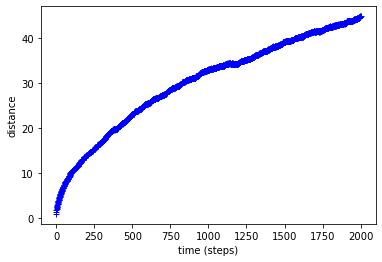

In [11]:
import matplotlib.pyplot as plt

#generate the arrays
walkers = np.zeros((1000,2000))
randomizer = np.random.choice([-1,1],np.shape(walkers))
#randomizer = np.random.randint(-1,2,np.shape(walkers)) #I am using choice instead of randint because it returns either -1 or 1.

#generate the distance of each walker
for i in range(np.shape(walkers)[0]):
    walkers[i] = walkers[i]+[np.sum(randomizer[i,0:j+1]) for j in range(np.shape(randomizer)[1])]
    
distance_sq = walkers**2

#create an array of zeros with length equal to the number of steps.
sq_mean_distance = np.zeros(np.shape(distance_sq)[1])

#populate the array with the average distances of the walkers for each step
for i in range(np.shape(distance_sq)[1]):
    sq_mean_distance[i] = np.mean(distance_sq[:,i])

#set the variables we want to plot
mean_distance = np.sqrt(sq_mean_distance)
time = np.arange(len(mean_distance))

#plot the average walk
plt.plot(time, mean_distance, 'b+')
plt.xlabel("time (steps)")
plt.ylabel("distance")
plt.show()

I never actually encountered the random walk before, but according to the [wikipedia page](https://en.wikipedia.org/wiki/Random_walk#One-dimensional_random_walk), it seems right that $\text{distance}^2 \propto \text{steps}$, since the expected value of the total translation of $n$ steps is of the order of $\sqrt{n}$

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

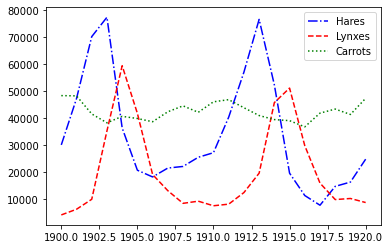

In [12]:
year, hare, lynx, carrot = np.loadtxt('populations.txt', unpack = True)

plt.plot(year, hare, "b-.", label = "Hares")
plt.plot(year, lynx, "r--", label = "Lynxes")
plt.plot(year, carrot, "g:", label = "Carrots")
plt.legend()
plt.show()

Since the hare population is controlled by both the environment's capacity (carrots) and the prevalence of the predator (lynx). So an increase in the hare population leads to a decrease in the amount of carrots available, and that same increase leads to the increase in lynx population. When the lynx population is high enough, and the carrot population is low enough, the hare population starts to drop, which leads to the amount of carrots available to slowly increase. The lynx population then encounters a lower amount of resources to thrive and starts dropping as well. Eventually the lynx population is low enough that it does not pose a threat to the hare population anymore, allowing it to increase again.

The hare population grows with a logistic model limited by the number of carrots in the environment. And in turn, the lynx population follows a predator-prey model with the hare population.